# Aula 6 - Visualiza√ß√£o e Story Telling

- [ ] Utilizar 2 t√©cnicas de visualiza√ß√£o
	- [ ] Infogr√°fico:
		- [ ] Fazer um infogr√°fico mostrando o perfil das paradas
			- [ ] probabilidade condicional de ser preso por ra√ßa
			- [ ] Perfil mais parado
	- [ ] Gr√°fico:
		- [ ] Fazer um gr√°fico de pizza mostrando a violation cometida
		- [ ] Fazer um gr√°fico de pizza mostrando a violation cometida por pessoas presas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
csv_path = "../data/police.csv"
df = pd.read_csv(csv_path)

In [3]:
from etl.main import PoliceDatasetEtl

police_dataset_etl = PoliceDatasetEtl(df.copy())
featured_df = police_dataset_etl.clean_transform()

## Infogr√°fico do Perfil das Paradas

Infogr√°fico feito na ferramenta: [venngage](https://infograph.venngage.com/)


#### De onde cada dado foi extra√≠do?


- Quadrante superior esquerdo: [notebook aulas 2 e 3](./etl_aulas_2_e_3.ipynb) 
- Quadrante superior direito: [notebook aulas 2 e 3](./etl_aulas_2_e_3.ipynb) - probabilidade condicional de um motorista ser preso dado que esse √© hisp√¢nico ou negro.
- Gr√°fico do meio: dados utilizados no gr√°fico de pizza abaixo.
- Quadrante inferior esquerdo: gr√°fico de pizza abaixo.
- Quadrante inferior direito: [notebook aula 5 - an√°lise descritiva](./analise_descritiva_aula_5.ipynb) - distribui√ß√µes.

![infografico](../visualizacao_aula_5_ifografico.png)

## Gr√°ficos de Violation

In [4]:
violations_df = featured_df.copy()
violations_df.violation = violations_df.violation.fillna("No Violation")
violations_arrested_df = violations_df.copy()
violations_not_arrested_df = violations_df.copy()
violations_arrested_df = violations_arrested_df[
    violations_arrested_df.is_arrested == True
]
violations_not_arrested_df = violations_not_arrested_df[
    violations_not_arrested_df.is_arrested == False
]

violations_grouped = violations_df.groupby("violation").counter.count()
display(violations_grouped)
violations_arrested_grouped = violations_arrested_df.groupby(
    "violation"
).counter.count()
violations_not_arrested_grouped = violations_not_arrested_df.groupby(
    "violation"
).counter.count()

violation
Equipment              11020
Moving violation       16224
No Violation            5333
Other                   4317
Registration/plates     3432
Seat belt               2952
Speeding               48463
Name: counter, dtype: int64

### Violations Que Resultaram em Pris√£o üöî

array([[  635, 10385],
       [  910, 15314],
       [  339,  5333],
       [  334,  3978],
       [   74,  3098],
       [  637,  2878]])

7

Text(0.5, 1.0, 'Violations - Arrested')

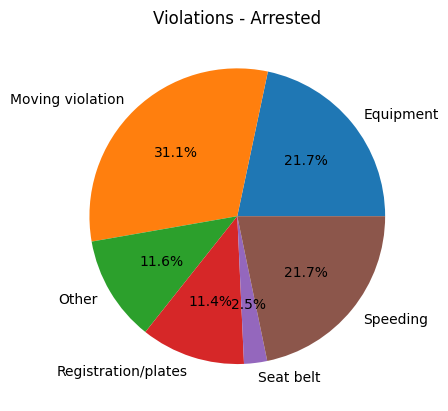

In [5]:
violations_data = np.array(
    [
        [x[0], x[1]]
        for x in zip(
            violations_arrested_grouped.to_list(),
            violations_not_arrested_grouped.to_list(),
        )
    ]
)
violations_label = violations_grouped.index.to_list()
size = len(violations_label)
display(violations_data)
display(size)


plt.pie(
    violations_arrested_grouped.to_list(),
    labels=violations_arrested_grouped.index.to_list(),
    autopct="%1.1f%%",
)
plt.title("Violations - Arrested")

### Violations Que N√£o Resultaram em Pris√£o üÜì 

Text(0.5, 1.0, 'Violations - Not Arrested')

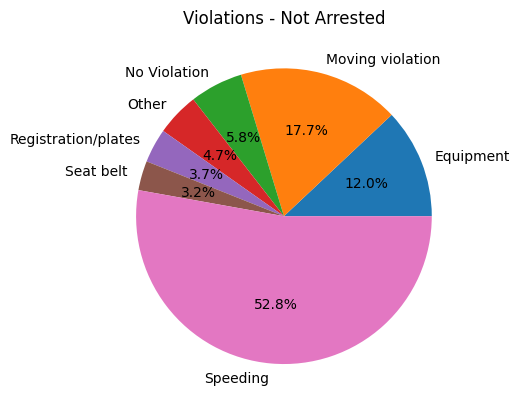

In [6]:
plt.pie(
    violations_grouped.to_list(),
    labels=violations_grouped.index.to_list(),
    autopct="%1.1f%%",
)
plt.title("Violations - Not Arrested")